ДЗ 3

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Создание и обучение модели
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


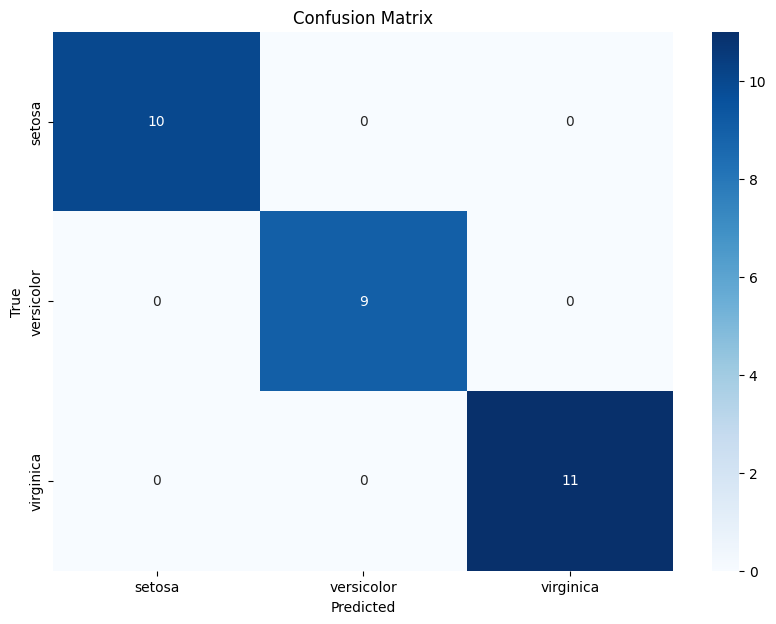

In [4]:
# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# Оценка качества модели
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Визуализация матрицы смежности
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [5]:
# Вычисление точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


ДЗ 4

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF
import gensim
from gensim import corpora
import nltk
from nltk.corpus import stopwords
import re

In [14]:
# Пример данных
data = {
    'text': [
        "The quick brown fox jumps over the lazy dog.",
        "Never jump over the lazy dog quickly.",
        "Brown foxes are quick and dogs are lazy.",
        "Lazy dogs are not quick and foxes are brown.",
        "Quick foxes jump over lazy dogs."
    ]
}

df = pd.DataFrame(data)

In [12]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()

print("LDA Topics:")
display_topics(lda, tf_feature_names, no_top_words)

print("\nLSA Topics:")
display_topics(lsa, tf_feature_names, no_top_words)

print("\nNMF Topics:")
display_topics(nmf, tf_feature_names, no_top_words)

NotFittedError: Vocabulary not fitted or provided

In [13]:
import spacy

# Загрузка модели spaCy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [ ]:
df['entities'] = df['text'].apply(extract_entities)

In [ ]:
for index, row in df.iterrows():
    print(f"Text {index+1}:")
    print(row['entities'])
    print()

In [ ]:
# Пример выделения сущностей по темам
for topic_idx in range(3):
    print(f"Entities in Topic {topic_idx+1}:")
    topic_texts = df[df['cleaned_text'].apply(lambda x: lda.transform([x])[0].argmax() == topic_idx)]
    for text in topic_texts['text']:
        print(extract_entities(text))
    print()